In [21]:
from traffic_simulator.Simulator import TrafficSimulator
from traffic_simulator.tool.DataTool import DataTool

input_graphml = "/home/yuhao/project/data/input_network.graphml"
input_csv = "/home/yuhao/project/data/input_orders.csv"

G = DataTool.reconstruct_graph(input_path=input_graphml)
orders = DataTool.match_orders_to_network(order_path=input_csv, G=G)
taxi_notes = []
for i in range(3):
    taxi_notes.append(
        "你需要关注以下3个订单聚集的时空区域（尽量前往）, 时空区域1: 经纬度位置 (121.357886, 31.208821), 包含26个路口节点, 订单数: 35;经纬度位置 (121.400857, 31.205276), 包含12个路口节点, 订单数: 14; 经纬度位置 (121.422955, 31.220648), 包含6个路口节点, 订单数: 6;"
        )
for i in range(7):
    taxi_notes.append("你需要关注以下2个取消订单聚集的时空区域（尽量前往）, 时空区域1: 经纬度位置 (121.356966, 31.209449), 包含16个路口节点, 订单数: 20; 时空区域2: 经纬度位置 (121.350966, 31.190449), 包含4个路口节点, 订单数: 5;")
    
# for i in range(10):
#     taxi_notes.append("")
print(taxi_notes)

simulator = TrafficSimulator(
    taxi_number=10,
    start_time=8*3600,
    time_window=60,
    road_network=G,
    orders_df=orders,
    order_match_strategy="nearest",
    taxi_reposition_strategy="balanced",
    order_saved=True,
    fleet_saved=False,
    taxi_preferences=taxi_notes,
)

simulator.run_simulation(until_step=60)

成功读取原始图文件，包含 1537 个节点和 2297 条边
原始图是连通的
重构后的图是连通的，所有节点可以互相到达
处理完成! 重构后的图包含 1537 个节点和 2266 条边
已构建KD树用于空间匹配
成功读取订单数据，包含 1269 条记录


匹配订单到路网: 100%|██████████| 1269/1269 [00:00<00:00, 5881.59it/s]


['你需要关注以下3个订单聚集的时空区域（尽量前往）, 时空区域1: 经纬度位置 (121.357886, 31.208821), 包含26个路口节点, 订单数: 35;经纬度位置 (121.400857, 31.205276), 包含12个路口节点, 订单数: 14; 经纬度位置 (121.422955, 31.220648), 包含6个路口节点, 订单数: 6;', '你需要关注以下3个订单聚集的时空区域（尽量前往）, 时空区域1: 经纬度位置 (121.357886, 31.208821), 包含26个路口节点, 订单数: 35;经纬度位置 (121.400857, 31.205276), 包含12个路口节点, 订单数: 14; 经纬度位置 (121.422955, 31.220648), 包含6个路口节点, 订单数: 6;', '你需要关注以下3个订单聚集的时空区域（尽量前往）, 时空区域1: 经纬度位置 (121.357886, 31.208821), 包含26个路口节点, 订单数: 35;经纬度位置 (121.400857, 31.205276), 包含12个路口节点, 订单数: 14; 经纬度位置 (121.422955, 31.220648), 包含6个路口节点, 订单数: 6;', '你需要关注以下2个取消订单聚集的时空区域（尽量前往）, 时空区域1: 经纬度位置 (121.356966, 31.209449), 包含16个路口节点, 订单数: 20; 时空区域2: 经纬度位置 (121.350966, 31.190449), 包含4个路口节点, 订单数: 5;', '你需要关注以下2个取消订单聚集的时空区域（尽量前往）, 时空区域1: 经纬度位置 (121.356966, 31.209449), 包含16个路口节点, 订单数: 20; 时空区域2: 经纬度位置 (121.350966, 31.190449), 包含4个路口节点, 订单数: 5;', '你需要关注以下2个取消订单聚集的时空区域（尽量前往）, 时空区域1: 经纬度位置 (121.356966, 31.209449), 包含16个路口节点, 订单数: 20; 时空区域2: 经纬度位置 (121.350966, 31.190449), 包含4个路口节点, 订单数: 5;', '你需要关注

Simulation Progress: 100%|██████████| 60/60 [00:00<00:00, 77.29step/s]


仿真结束，当前时间: 32400
订单数据已成功导出到: /home/yuhao/project/TrafficSimulator/results/orders_history_20250429_1814.json
===== 订单关键指标分析报告 =====
1. 订单总数: 68
2. 响应率: 67.65%
3. 平均响应等待时间: 30.72 时间单位
   (从订单请求到分配出租车的平均时间)
4. 平均响应后的接客时间: 163.14 时间单位
   (从分配出租车到接客的平均时间)
5. 平均行程时间: 255.47 时间单位
   (从接客到送达的平均时间)
6. 平均车辆占用率: 47.11%
   (车辆载客时间占总运营时间的平均比例)
7. 特殊情况订单:
   - 无接客时间但有送达时间的订单: 0
   - 起点终点相同的订单: 0
   - 分配时间异常的订单: 0
   - 行程时间为负的订单: 0
   - 特殊情况订单总数: 0

特殊情况订单详情:


In [7]:
import json
import matplotlib.pyplot as plt
import pandas as pd
from typing import Dict, List, Tuple, Any
import numpy as np
from traffic_simulator.manager.RoadNetworkManager import RoadNetworkManager
from traffic_simulator.tool.DataTool import DataTool
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import matplotlib.cm as cm
from datetime import datetime, timedelta
import folium
from folium.plugins import HeatMap
import matplotlib.dates as mdates
from sklearn.cluster import KMeans

def analyze_and_report_hotspots(json_file_path: str, road_network_manager) -> str:
    """
    分析订单数据，找出取消订单聚集的区域，并生成简洁的文本报告
    1. 统计每个取消订单的时刻和位置
    2. 将一天按三个小时分为8个时段
    3. 对每个时段进行空间聚类，找出取消订单最多的区域
    
    参数:
        json_file_path: JSON文件路径
        road_network_manager: 道路网络管理器实例
        
    返回:
        包含取消订单聚集区域信息的文本报告
    """
    import json
    import numpy as np
    from sklearn.cluster import DBSCAN
    from collections import defaultdict
    
    # 1. 读取JSON文件
    with open(json_file_path, 'r') as f:
        orders_data = json.load(f)
    
    # 2. 提取所有取消订单的时间和位置
    cancelled_orders = []
    
    for order_id, order_info in orders_data.items():
        if order_info.get('status') == 'cancelled':
        # if True:
            pickup_node = order_info.get('pickup_node')
            request_time = order_info.get('request_time')
            
            if pickup_node is not None and request_time is not None:
                try:
                    # 获取节点坐标
                    coord = road_network_manager.get_coord_by_node(pickup_node)
                    
                    # 添加到取消订单列表
                    cancelled_orders.append({
                        'order_id': order_id,
                        'node_id': pickup_node,
                        'coord': coord,
                        'time': request_time
                    })
                except Exception:
                    # 如果无法获取坐标，跳过该订单
                    continue
    
    # 3. 将取消订单按时间段分组
    time_periods = defaultdict(list)
    
    for order in cancelled_orders:
        # 获取时间段
        hour = int((order['time'] / 3600) % 24)
        period_index = hour // 3
        start_hour = period_index * 3
        end_hour = start_hour + 3
        time_period = f"{start_hour:02d}:00-{end_hour:02d}:00"
        
        # 添加到对应的时间段
        time_periods[time_period].append(order)
    
    # 4. 对每个时间段进行空间聚类
    def spatial_clustering(orders, spatial_eps=0.01, min_samples=1):
        """
        对取消订单进行空间聚类
        spatial_eps: 空间距离阈值（经纬度单位，0.003约300米）
        min_samples: 形成聚类的最小样本数
        """
        if not orders:
            return []
        
        # 提取坐标
        coords = np.array([order['coord'] for order in orders])
        
        # 应用DBSCAN进行空间聚类
        clustering = DBSCAN(eps=spatial_eps, min_samples=min_samples).fit(coords)
        labels = clustering.labels_
        
        # 为每个空间聚类找到中心点和包含的订单
        space_clusters = []
        for label in set(labels):
            if label == -1:  # 忽略噪声点
                continue
            
            # 获取该聚类的所有订单
            cluster_orders = [orders[i] for i in range(len(orders)) if labels[i] == label]
            
            # 计算聚类的空间中心
            cluster_points = np.array([order['coord'] for order in cluster_orders])
            center = np.mean(cluster_points, axis=0)
            
            # 收集该聚类包含的节点ID
            nodes = [order['node_id'] for order in cluster_orders]
            
            # 计算取消订单数量
            cancelled_count = len(cluster_orders)
            
            space_clusters.append({
                'label': label,
                'center': center,
                'nodes': list(set(nodes)),  # 去重
                'cancelled_orders': cancelled_count
            })
        
        # 按取消订单数量降序排序
        space_clusters.sort(key=lambda x: -x['cancelled_orders'])
        
        return space_clusters
    
    # 5. 对每个时间段进行空间聚类
    all_hotspot_clusters = []
    
    for time_period, orders in time_periods.items():
        # 进行空间聚类
        space_clusters = spatial_clustering(orders)
        
        # 为每个空间聚类添加时间信息
        for cluster in space_clusters:
            cluster['time_period'] = time_period
        
        # 添加到总列表
        all_hotspot_clusters.extend(space_clusters)
    
    # 6. 筛选取消订单数量较多的聚类
    min_cancelled_threshold = 5  # 至少3个取消订单
    
    hotspot_clusters = [
        cluster for cluster in all_hotspot_clusters
        if cluster['cancelled_orders'] >= min_cancelled_threshold
    ]
    
    # 按时间段和取消订单数量排序
    hotspot_clusters.sort(key=lambda x: (x['time_period'], -x['cancelled_orders']))
    
    # 7. 生成报告文本
    total_orders = len(orders_data)
    cancelled_count = len([order_id for order_id, info in orders_data.items() if info.get('status') == 'cancelled'])
    completed_count = total_orders - cancelled_count
    cancellation_rate = cancelled_count / total_orders if total_orders > 0 else 0
    
    report = f"订单分析报告:\n"
    report += f"总订单数: {total_orders}, 完成订单: {completed_count}, 取消订单: {cancelled_count}, 总取消率: {cancellation_rate:.2%}\n\n"
    
    if not hotspot_clusters:
        report += "未发现取消订单聚集的区域。"
        return report
    
    report += f"发现{len(hotspot_clusters)}个取消订单聚集的时空区域:\n"
    
    # 按时间段组织报告
    current_time_period = None
    cluster_counter = 1
    
    for cluster in hotspot_clusters:
        # 如果时间段变化，添加时间段标题
        if current_time_period != cluster['time_period']:
            current_time_period = cluster['time_period']
            report += f"【时间段: {current_time_period}】"
        
        # 获取聚类中心的坐标
        center_lon, center_lat = cluster['center']
        
        # 获取聚类中的节点数量和部分节点ID
        node_count = len(cluster['nodes'])
        sample_nodes = cluster['nodes'][:3] if len(cluster['nodes']) > 3 else cluster['nodes']
        
        report += f"区域中心{cluster_counter}: ({center_lon:.6f}, {center_lat:.6f}), "
        report += f"包含{node_count}个路口节点, "
        report += f"参考路口: {', '.join(map(str, sample_nodes))}, "
        report += f"订单数: {cluster['cancelled_orders']}; "
        
        cluster_counter += 1
    
    report += "\n"
    
    # 8. 添加建议
    report += "建议:\n"
    report += "1. 在上述取消订单聚集区域增加出租车调度\n"
    report += "2. 对于取消订单特别多的区域，可考虑设置专门的候客区或临时停靠点\n"
    report += "3. 针对不同时段的热点区域，可制定差异化的出租车调度策略\n"
    
    return report

# 使用示例
def print_hotspot_report(json_file_path, road_network_manager):
    report = analyze_and_report_hotspots(json_file_path, road_network_manager)
    print(report)

# 调用函数
input_graphml = "/home/yuhao/project/data/input_network.graphml"
G = DataTool.reconstruct_graph(input_path=input_graphml)
road_network_manager = RoadNetworkManager(G)
print_hotspot_report('/home/yuhao/project/TrafficSimulator/results/orders_history_20250429_1338.json', road_network_manager)



成功读取原始图文件，包含 1537 个节点和 2297 条边
原始图是连通的
重构后的图是连通的，所有节点可以互相到达
处理完成! 重构后的图包含 1537 个节点和 2266 条边
订单分析报告:
总订单数: 68, 完成订单: 43, 取消订单: 25, 总取消率: 36.76%

发现1个取消订单聚集的时空区域:
【时间段: 06:00-09:00】区域中心1: (121.355945, 31.210211), 包含16个路口节点, 参考路口: 258, 260, 262, 订单数: 21; 
建议:
1. 在上述取消订单聚集区域增加出租车调度
2. 对于取消订单特别多的区域，可考虑设置专门的候客区或临时停靠点
3. 针对不同时段的热点区域，可制定差异化的出租车调度策略



成功读取原始图文件，包含 1537 个节点和 2297 条边
原始图是连通的
重构后的图是连通的，所有节点可以互相到达
处理完成! 重构后的图包含 1537 个节点和 2266 条边
总订单数: 859
取消订单数: 278
完成订单数: 577
取消率: 32.36%


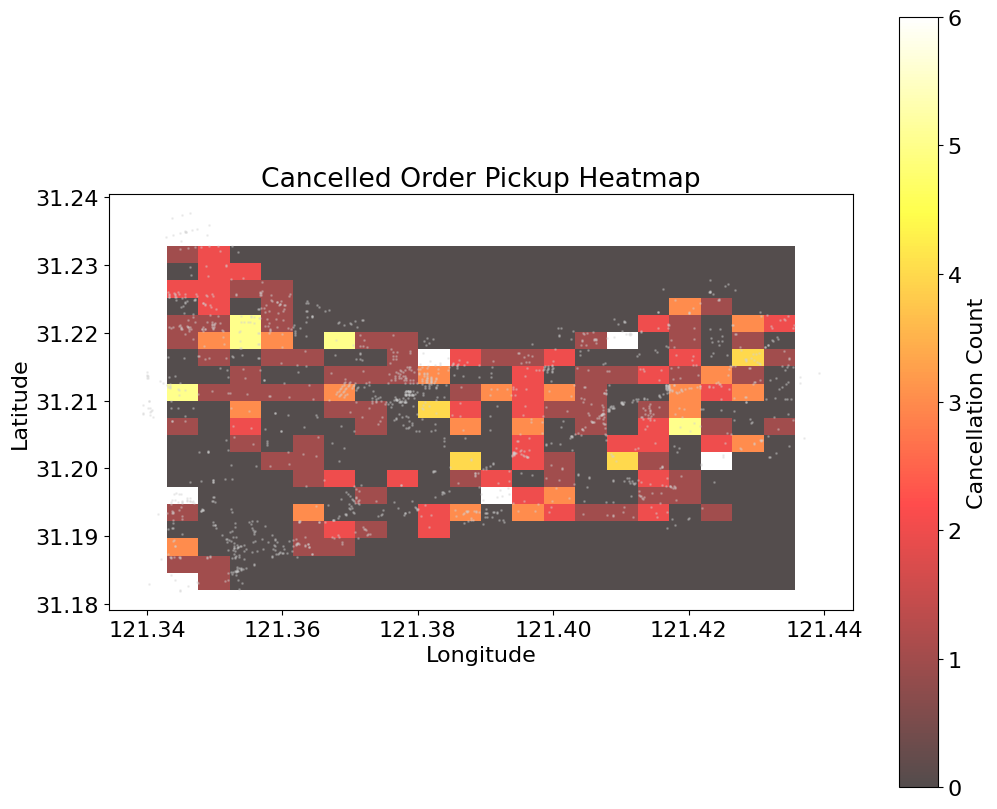

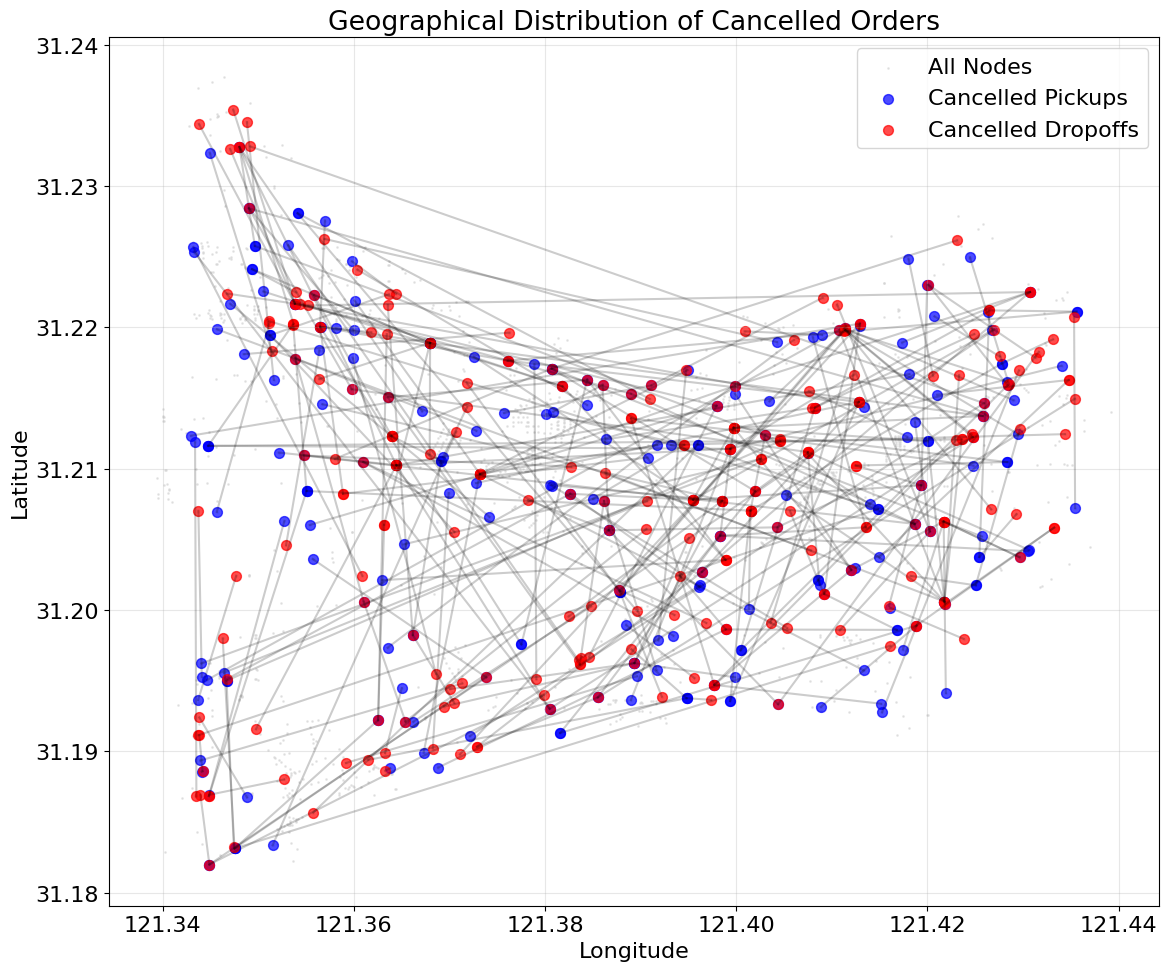

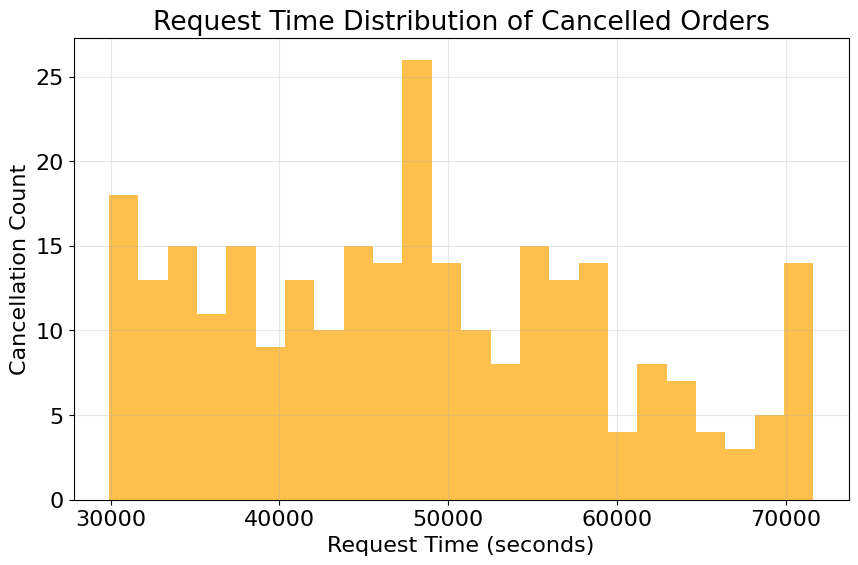


===== 时空聚类分析 =====
识别出 14 个时空聚类


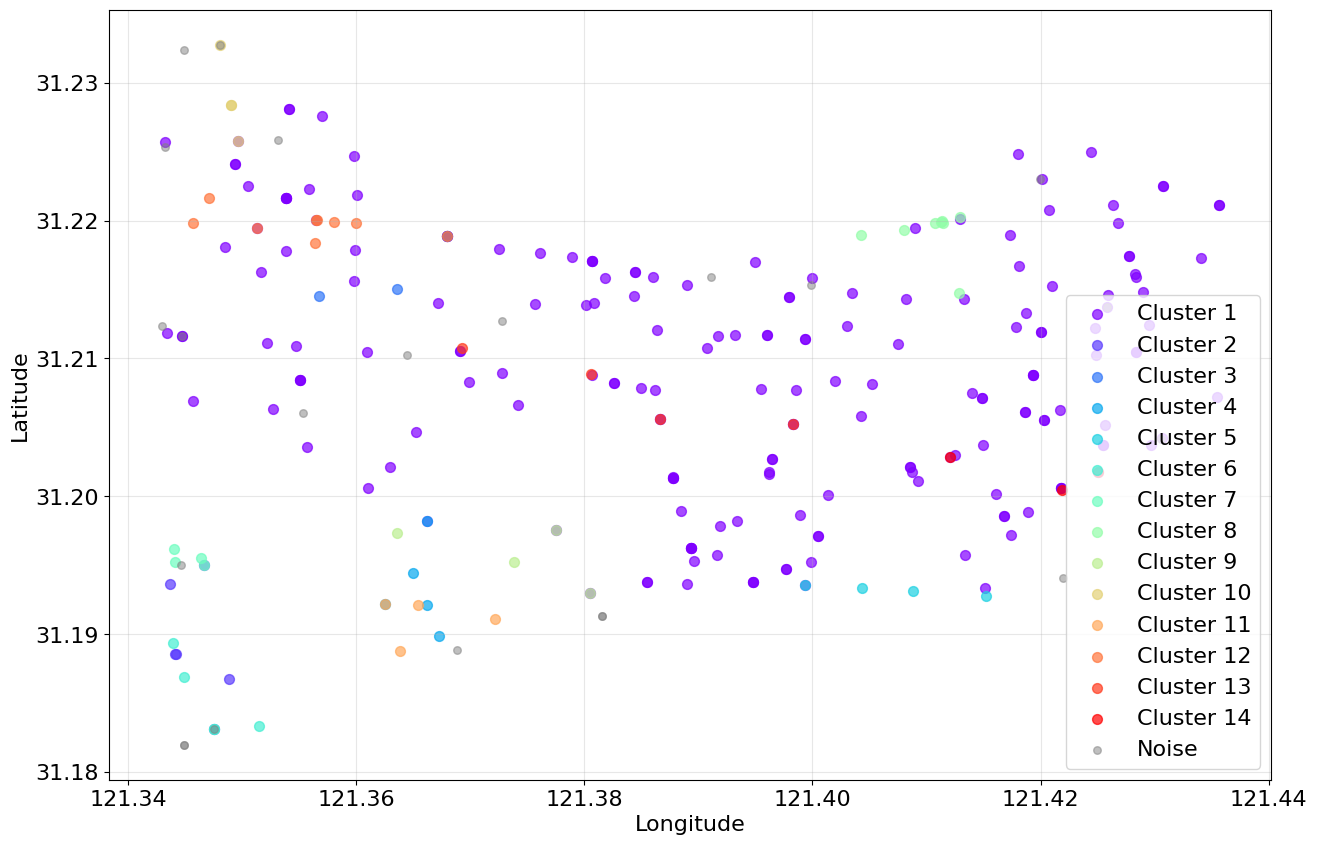


----- 按聚类的取消率 -----

----- 按时间顺序排列的高取消率区域 -----
热点 1:
  位置: (121.389281, 31.196091)
  最近路口节点ID: 176
  路口节点坐标: (121.389356, 31.196240)
  时间范围: 13.7-17.1 小时
  取消率: 50.00%
  总订单数: 10.0
  取消订单数: 5.0



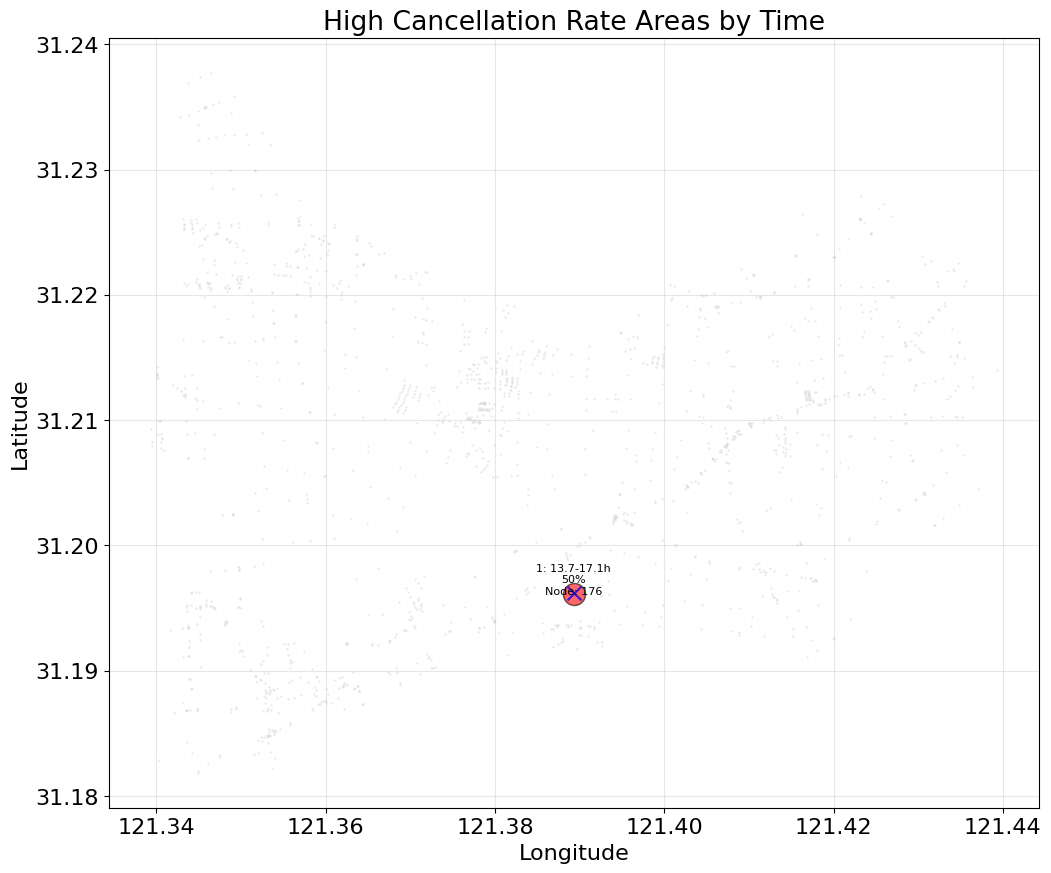

<Figure size 1200x600 with 0 Axes>

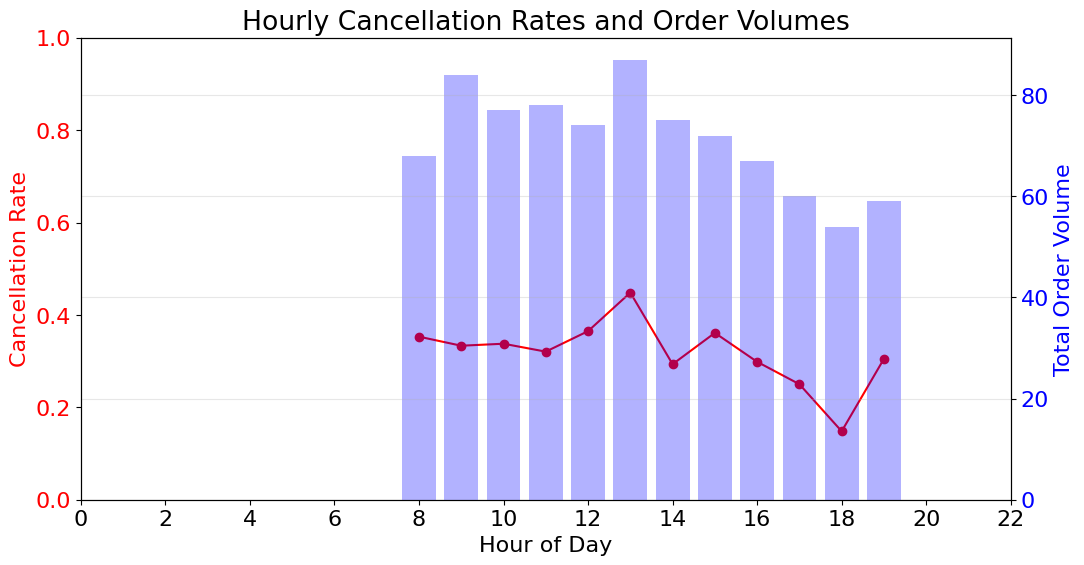


===== 将高取消率区域分配给1辆出租车 =====


/home/yuhao/.local/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 20986 (\N{CJK UNIFIED IDEOGRAPH-51FA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/yuhao/.local/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 31199 (\N{CJK UNIFIED IDEOGRAPH-79DF}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/yuhao/.local/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 36710 (\N{CJK UNIFIED IDEOGRAPH-8F66}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


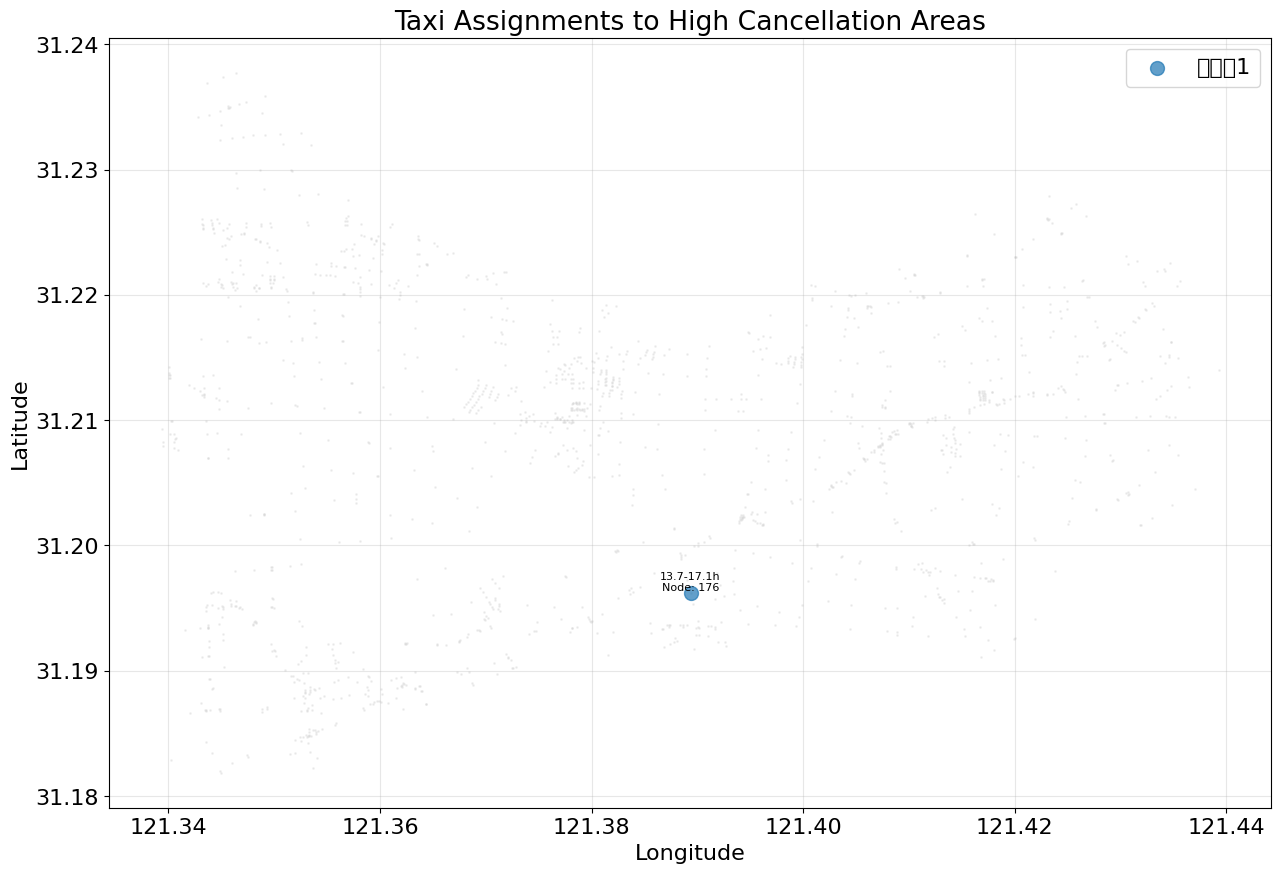


----- 出租车任务分配 -----

出租车1的任务:
需要关注 1 个高取消率区域:
出租车1需要关注以下高取消率区域: 在13.7-17.1时段关注路口节点176(位置坐标:121.389356, 31.196240)，该区域取消率为50%; 


In [51]:
import json
import matplotlib.pyplot as plt
import pandas as pd
from typing import Dict, List, Tuple, Any
import numpy as np
from traffic_simulator.manager.RoadNetworkManager import RoadNetworkManager
from traffic_simulator.tool.DataTool import DataTool
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import matplotlib.cm as cm
from datetime import datetime, timedelta
import folium
from folium.plugins import HeatMap
import matplotlib.dates as mdates
from sklearn.cluster import KMeans

def analyze_cancelled_orders(json_file_path: str, road_network_manager, num_taxis=5) -> None:
    """
    分析并可视化取消的订单分布
    
    参数:
        json_file_path: JSON文件路径
        road_network_manager: 道路网络管理器实例，用于获取节点坐标
        num_taxis: 要分配的出租车数量
    """
    # 1. 读取JSON文件
    with open(json_file_path, 'r') as f:
        orders_data = json.load(f)
    
    # 2. 统计取消的订单和完成的订单
    cancelled_orders = {}
    completed_orders = {}
    
    for order_id, order_info in orders_data.items():
        if order_info.get('status') == 'cancelled':
            cancelled_orders[order_id] = order_info
        elif order_info.get('status') == 'completed':
            completed_orders[order_id] = order_info
    
    # 3. 打印取消订单的统计信息
    print(f"总订单数: {len(orders_data)}")
    print(f"取消订单数: {len(cancelled_orders)}")
    print(f"完成订单数: {len(completed_orders)}")
    print(f"取消率: {len(cancelled_orders) / len(orders_data):.2%}")
    
    # 4. 获取取消订单和完成订单的起点和终点坐标
    cancelled_pickup_data = []  # 将存储(coord, time, order_id)
    cancelled_dropoff_data = []
    completed_pickup_data = []
    completed_dropoff_data = []
    
    # 处理取消订单
    for order_id, order_info in cancelled_orders.items():
        pickup_node = order_info.get('pickup_node')
        dropoff_node = order_info.get('dropoff_node')
        request_time = order_info.get('request_time')
        
        if pickup_node is not None:
            try:
                pickup_coord = road_network_manager.get_coord_by_node(pickup_node)
                cancelled_pickup_data.append((pickup_coord, request_time, order_id))
            except Exception as e:
                print(f"获取取消订单 {order_id} 的起点坐标时出错: {str(e)}")
        
        if dropoff_node is not None:
            try:
                dropoff_coord = road_network_manager.get_coord_by_node(dropoff_node)
                cancelled_dropoff_data.append((dropoff_coord, request_time, order_id))
            except Exception as e:
                print(f"获取取消订单 {order_id} 的终点坐标时出错: {str(e)}")
    
    # 处理完成订单
    for order_id, order_info in completed_orders.items():
        pickup_node = order_info.get('pickup_node')
        dropoff_node = order_info.get('dropoff_node')
        request_time = order_info.get('request_time')
        
        if pickup_node is not None:
            try:
                pickup_coord = road_network_manager.get_coord_by_node(pickup_node)
                completed_pickup_data.append((pickup_coord, request_time, order_id))
            except Exception as e:
                print(f"获取完成订单 {order_id} 的起点坐标时出错: {str(e)}")
        
        if dropoff_node is not None:
            try:
                dropoff_coord = road_network_manager.get_coord_by_node(dropoff_node)
                completed_dropoff_data.append((dropoff_coord, request_time, order_id))
            except Exception as e:
                print(f"获取完成订单 {order_id} 的终点坐标时出错: {str(e)}")
    
    # 5. 可视化取消订单的分布
    visualize_cancelled_orders(cancelled_pickup_data, cancelled_dropoff_data, cancelled_orders, road_network_manager)
    
    # 6. 时空聚类分析
    hotspots = spatiotemporal_clustering(cancelled_pickup_data, completed_pickup_data, road_network_manager)
    
    # 7. 分配热点区域给出租车
    assign_hotspots_to_taxis(hotspots, num_taxis, road_network_manager)

def visualize_cancelled_orders(pickup_data: List[Tuple], dropoff_data: List[Tuple], 
                              cancelled_orders: Dict, road_network_manager) -> None:
    """
    可视化取消订单的地理分布
    
    参数:
        pickup_data: 取消订单的起点数据列表 [(coord, time, order_id), ...]
        dropoff_data: 取消订单的终点数据列表 [(coord, time, order_id), ...]
        cancelled_orders: 取消订单信息字典
        road_network_manager: 道路网络管理器实例
    """
    # 创建图形
    plt.figure(figsize=(12, 10))
    
    # 1. 绘制所有道路网络节点作为背景（如果可用）
    try:
        # 获取所有节点的坐标
        all_nodes = road_network_manager.get_all_nodes()
        all_coords = [road_network_manager.get_coord_by_node(node) for node in all_nodes]
        
        # 提取经纬度
        all_lons = [coord[0] for coord in all_coords]
        all_lats = [coord[1] for coord in all_coords]
        
        # 绘制所有节点（灰色小点）
        plt.scatter(all_lons, all_lats, s=1, color='lightgray', alpha=0.5, label='All Nodes')
    except Exception as e:
        print(f"绘制道路网络节点时出错: {str(e)}")
    
    # 2. 绘制取消订单的起点
    if pickup_data:
        # 提取起点的经纬度
        pickup_lons = [data[0][0] for data in pickup_data]
        pickup_lats = [data[0][1] for data in pickup_data]
        
        # 绘制起点（蓝色）
        plt.scatter(pickup_lons, pickup_lats, s=50, color='blue', alpha=0.7, label='Cancelled Pickups')
    
    # 3. 绘制取消订单的终点
    if dropoff_data:
        # 提取终点的经纬度
        dropoff_lons = [data[0][0] for data in dropoff_data]
        dropoff_lats = [data[0][1] for data in dropoff_data]
        
        # 绘制终点（红色）
        plt.scatter(dropoff_lons, dropoff_lats, s=50, color='red', alpha=0.7, label='Cancelled Dropoffs')
    
    # 4. 绘制起点到终点的连线
    for pickup in pickup_data:
        pickup_coord, _, pickup_order_id = pickup
        # 找到对应的终点坐标
        for dropoff in dropoff_data:
            dropoff_coord, _, dropoff_order_id = dropoff
            if pickup_order_id == dropoff_order_id:
                # 绘制从起点到终点的线
                plt.plot([pickup_coord[0], dropoff_coord[0]], 
                         [pickup_coord[1], dropoff_coord[1]], 
                         'k-', alpha=0.2)
                break
    
    # 5. 计算并显示热点区域
    if pickup_data:
        plt.figure(figsize=(12, 10))
        plt.title('Cancelled Order Pickup Heatmap')
        
        # 创建热力图数据
        pickup_lons = np.array([data[0][0] for data in pickup_data])
        pickup_lats = np.array([data[0][1] for data in pickup_data])
        
        # 使用2D直方图创建热力图
        heatmap, xedges, yedges = np.histogram2d(pickup_lons, pickup_lats, bins=20)
        extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
        
        plt.imshow(heatmap.T, extent=extent, origin='lower', cmap='hot', alpha=0.7)
        plt.colorbar(label='Cancellation Count')
        
        # 添加背景地图节点（如果可用）
        try:
            plt.scatter(all_lons, all_lats, s=1, color='lightgray', alpha=0.3)
        except:
            pass
        
        plt.xlabel('Longitude')
        plt.ylabel('Latitude')
    
    # 6. 设置图形标题和标签
    plt.figure(1)
    plt.title('Geographical Distribution of Cancelled Orders')
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    # 7. 保存图像
    plt.tight_layout()
    
    # 8. 显示图像
    plt.show()
    
    # 9. 额外分析：取消订单的时间分布
    request_times = [order_info.get('request_time') for order_info in cancelled_orders.values()]
    if request_times:
        plt.figure(figsize=(10, 6))
        plt.hist(request_times, bins=24, alpha=0.7, color='orange')
        plt.title('Request Time Distribution of Cancelled Orders')
        plt.xlabel('Request Time (seconds)')
        plt.ylabel('Cancellation Count')
        plt.grid(True, alpha=0.3)
        plt.show()

def spatiotemporal_clustering(cancelled_pickup_data, completed_pickup_data, road_network_manager):
    """
    对取消订单进行时空聚类分析，找出高取消率的时空区域
    
    参数:
        cancelled_pickup_data: 取消订单的起点数据 [(coord, time, order_id), ...]
        completed_pickup_data: 完成订单的起点数据 [(coord, time, order_id), ...]
        road_network_manager: 道路网络管理器实例
        
    返回:
        高取消率区域列表，按时间排序
    """
    print("\n===== 时空聚类分析 =====")
    
    # 1. 准备数据
    # 将时间转换为小时（0-24）
    def seconds_to_hour(seconds):
        return (seconds / 3600) % 24
    
    # 创建时空特征数据
    cancelled_features = []
    for data in cancelled_pickup_data:
        coord, time, _ = data
        hour = seconds_to_hour(time)
        cancelled_features.append([coord[0], coord[1], hour])
    
    completed_features = []
    for data in completed_pickup_data:
        coord, time, _ = data
        hour = seconds_to_hour(time)
        completed_features.append([coord[0], coord[1], hour])
    
    # 如果数据太少，无法进行聚类
    if len(cancelled_features) < 5:
        print("取消订单数量太少，无法进行时空聚类分析")
        return []
    
    # 2. 标准化特征
    X = np.array(cancelled_features)
    X_scaled = StandardScaler().fit_transform(X)
    
    # 3. 使用DBSCAN进行聚类
    # 调整eps和min_samples参数以获得合理的聚类结果
    db = DBSCAN(eps=0.5, min_samples=3).fit(X_scaled)
    labels = db.labels_
    
    # 聚类数量（不包括噪声点）
    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    print(f"识别出 {n_clusters} 个时空聚类")
    
    # 4. 分析每个聚类
    high_cancellation_cells = []
    
    if n_clusters > 0:
        # 创建聚类可视化图形
        plt.figure(figsize=(15, 10))
        
        # 为聚类定义颜色
        colors = cm.rainbow(np.linspace(0, 1, n_clusters))
        
        # 绘制每个聚类
        for i, color in zip(range(n_clusters), colors):
            cluster_points = X[labels == i]
            plt.scatter(cluster_points[:, 0], cluster_points[:, 1], 
                        color=color, s=50, alpha=0.7, 
                        label=f'Cluster {i+1}')
        
        # 绘制噪声点
        noise_points = X[labels == -1]
        if len(noise_points) > 0:
            plt.scatter(noise_points[:, 0], noise_points[:, 1], 
                        color='gray', s=30, alpha=0.5, 
                        label='Noise')
        
        plt.xlabel('Longitude')
        plt.ylabel('Latitude')
        plt.legend()
        plt.grid(True, alpha=0.3)
        plt.show()
        
        # 5. 计算每个聚类的取消率
        print("\n----- 按聚类的取消率 -----")
        
        # 创建地图网格
        lon_min, lon_max = min(X[:, 0]), max(X[:, 0])
        lat_min, lat_max = min(X[:, 1]), max(X[:, 1])
        
        # 定义网格单元
        lon_bins = np.linspace(lon_min, lon_max, 10)
        lat_bins = np.linspace(lat_min, lat_max, 10)
        hour_bins = np.linspace(0, 24, 8)  # 3小时时间段
        
        # 为取消订单创建3D直方图
        cancelled_hist, _ = np.histogramdd(X, bins=[lon_bins, lat_bins, hour_bins])
        
        # 为完成订单创建3D直方图
        completed_array = np.array(completed_features)
        if len(completed_array) > 0:
            completed_hist, _ = np.histogramdd(completed_array, bins=[lon_bins, lat_bins, hour_bins])
        else:
            completed_hist = np.zeros_like(cancelled_hist)
        
        # 计算每个单元的取消率
        total_hist = cancelled_hist + completed_hist
        cancellation_rate = np.zeros_like(cancelled_hist)
        np.divide(cancelled_hist, total_hist, out=cancellation_rate, where=total_hist > 0)
        
        # 找出高取消率的单元
        high_rate_threshold = 0.5  # 50%取消率阈值
        high_volume_threshold = 10  # 至少3个订单
        
        for i in range(len(lon_bins)-1):
            for j in range(len(lat_bins)-1):
                for k in range(len(hour_bins)-1):
                    total_orders = total_hist[i, j, k]
                    if total_orders >= high_volume_threshold:
                        rate = cancellation_rate[i, j, k]
                        if rate >= high_rate_threshold:
                            center_lon = (lon_bins[i] + lon_bins[i+1]) / 2
                            center_lat = (lat_bins[j] + lat_bins[j+1]) / 2
                            start_hour = hour_bins[k]
                            end_hour = hour_bins[k+1]
                            
                            # 将经纬度坐标转换为最近的路口节点
                            try:
                                nearest_node = road_network_manager.get_node_by_coord(center_lon, center_lat)
                                # 获取节点的确切坐标
                                exact_coord = road_network_manager.get_coord_by_node(nearest_node)
                                
                                high_cancellation_cells.append({
                                    'longitude': center_lon,
                                    'latitude': center_lat,
                                    'node_id': nearest_node,
                                    'node_longitude': exact_coord[0],
                                    'node_latitude': exact_coord[1],
                                    'time_range': f"{start_hour:.1f}-{end_hour:.1f}",
                                    'start_hour': start_hour,
                                    'end_hour': end_hour,
                                    'cancellation_rate': rate,
                                    'total_orders': total_hist[i, j, k],
                                    'cancelled_orders': cancelled_hist[i, j, k]
                                })
                            except Exception as e:
                                print(f"无法找到坐标({center_lon}, {center_lat})附近的节点: {str(e)}")
        
        # 按时间排序
        high_cancellation_cells.sort(key=lambda x: x['start_hour'])
        
        # 打印高取消率区域
        print("\n----- 按时间顺序排列的高取消率区域 -----")
        if high_cancellation_cells:
            for i, cell in enumerate(high_cancellation_cells):
                print(f"热点 {i+1}:")
                print(f"  位置: ({cell['longitude']:.6f}, {cell['latitude']:.6f})")
                print(f"  最近路口节点ID: {cell['node_id']}")
                print(f"  路口节点坐标: ({cell['node_longitude']:.6f}, {cell['node_latitude']:.6f})")
                print(f"  时间范围: {cell['time_range']} 小时")
                print(f"  取消率: {cell['cancellation_rate']:.2%}")
                print(f"  总订单数: {cell['total_orders']}")
                print(f"  取消订单数: {cell['cancelled_orders']}")
                print()
            
            # 在地图上可视化高取消率区域
            plt.figure(figsize=(12, 10))
            
            # 绘制背景（所有节点）
            try:
                all_nodes = road_network_manager.get_all_nodes()
                all_coords = [road_network_manager.get_coord_by_node(node) for node in all_nodes]
                all_lons = [coord[0] for coord in all_coords]
                all_lats = [coord[1] for coord in all_coords]
                plt.scatter(all_lons, all_lats, s=1, color='lightgray', alpha=0.3)
            except Exception as e:
                print(f"绘制背景节点时出错: {str(e)}")
            
            # 绘制高取消率单元
            for i, cell in enumerate(high_cancellation_cells):
                # 绘制聚类中心点
                plt.scatter(cell['longitude'], cell['latitude'], 
                           s=cell['cancellation_rate'] * 500, 
                           color='red', alpha=0.6, 
                           edgecolors='black')
                
                # 绘制对应的最近路口节点
                plt.scatter(cell['node_longitude'], cell['node_latitude'],
                           s=100, color='blue', alpha=0.8,
                           marker='x')
                
                # 连接聚类中心和最近路口节点
                plt.plot([cell['longitude'], cell['node_longitude']], 
                         [cell['latitude'], cell['node_latitude']], 
                         'k--', alpha=0.5)
                
                # 添加标注
                plt.annotate(f"{i+1}: {cell['time_range']}h\n{cell['cancellation_rate']:.0%}\nNode: {cell['node_id']}", 
                            (cell['longitude'], cell['latitude']),
                            fontsize=8, ha='center')
            
            plt.title('High Cancellation Rate Areas by Time')
            plt.xlabel('Longitude')
            plt.ylabel('Latitude')
            plt.grid(True, alpha=0.3)
            plt.show()
            
            # 按小时的时间分布
            plt.figure(figsize=(12, 6))
            
            # 按小时分组
            hour_data = {}
            for i in range(24):
                hour_data[i] = {'cancelled': 0, 'completed': 0}
            
            # 按小时统计取消订单
            for data in cancelled_pickup_data:
                _, time, _ = data
                hour = int(seconds_to_hour(time))
                hour_data[hour]['cancelled'] += 1
            
            # 按小时统计完成订单
            for data in completed_pickup_data:
                _, time, _ = data
                hour = int(seconds_to_hour(time))
                hour_data[hour]['completed'] += 1
            
            # 计算每小时的取消率
            hours = []
            rates = []
            volumes = []
            
            for hour, counts in hour_data.items():
                total = counts['cancelled'] + counts['completed']
                if total > 0:
                    rate = counts['cancelled'] / total
                    hours.append(hour)
                    rates.append(rate)
                    volumes.append(total)
            
            # 按小时排序
            sorted_data = sorted(zip(hours, rates, volumes))
            hours, rates, volumes = zip(*sorted_data) if sorted_data else ([], [], [])
            
            # 绘制每小时的取消率
            fig, ax1 = plt.subplots(figsize=(12, 6))
            
            # 绘制取消率
            ax1.plot(hours, rates, 'r-', marker='o')
            ax1.set_xlabel('Hour of Day')
            ax1.set_ylabel('Cancellation Rate', color='r')
            ax1.tick_params(axis='y', labelcolor='r')
            ax1.set_ylim(0, 1)
            
            # 绘制订单量
            ax2 = ax1.twinx()
            ax2.bar(hours, volumes, alpha=0.3, color='b')
            ax2.set_ylabel('Total Order Volume', color='b')
            ax2.tick_params(axis='y', labelcolor='b')
            
            plt.title('Hourly Cancellation Rates and Order Volumes')
            plt.grid(True, alpha=0.3)
            plt.xticks(range(0, 24, 2))
            plt.show()
        else:
            print("没有找到高取消率区域")
    
    return high_cancellation_cells

def assign_hotspots_to_taxis(hotspots, num_taxis, road_network_manager):
    """
    将高取消率区域分配给出租车
    
    参数:
        hotspots: 高取消率区域列表
        num_taxis: 出租车数量
        road_network_manager: 道路网络管理器实例
    """
    if not hotspots:
        print("没有高取消率区域可分配")
        return
    
    print(f"\n===== 将高取消率区域分配给{num_taxis}辆出租车 =====")
    
    # 如果热点数量少于出租车数量，则一些出租车可能不会被分配热点
    actual_taxis = min(num_taxis, len(hotspots))
    
    # 按时间段对热点进行分组
    time_groups = {}
    for hotspot in hotspots:
        start_hour = hotspot['start_hour']
        # 将一天分为几个时间段：凌晨(0-6)、上午(6-12)、下午(12-18)、晚上(18-24)
        if 0 <= start_hour < 6:
            period = "凌晨(0-6点)"
        elif 6 <= start_hour < 12:
            period = "上午(6-12点)"
        elif 12 <= start_hour < 18:
            period = "下午(12-18点)"
        else:
            period = "晚上(18-24点)"
        
        if period not in time_groups:
            time_groups[period] = []
        time_groups[period].append(hotspot)
    
    # 对于每个时间段，使用K-means聚类将热点分配给出租车
    taxi_assignments = {f"出租车{i+1}": [] for i in range(actual_taxis)}
    
    # 为每个时间段分配出租车
    for period, period_hotspots in time_groups.items():
        if not period_hotspots:
            continue
        
        # 如果该时间段的热点数量少于出租车数量，则每个热点分配一辆车
        if len(period_hotspots) <= actual_taxis:
            for i, hotspot in enumerate(period_hotspots):
                taxi_assignments[f"出租车{i+1}"].append(hotspot)
        else:
            # 使用K-means将热点聚类，然后分配给出租车
            # 提取热点坐标
            coords = np.array([[h['node_longitude'], h['node_latitude']] for h in period_hotspots])
            
            # 使用K-means聚类
            kmeans = KMeans(n_clusters=actual_taxis, random_state=0).fit(coords)
            labels = kmeans.labels_
            
            # 将每个聚类中的热点分配给对应的出租车
            for i in range(actual_taxis):
                cluster_hotspots = [period_hotspots[j] for j in range(len(period_hotspots)) if labels[j] == i]
                taxi_assignments[f"出租车{i+1}"].extend(cluster_hotspots)
    
    # 可视化分配结果
    plt.figure(figsize=(15, 10))
    
    # 绘制背景（所有节点）
    try:
        all_nodes = road_network_manager.get_all_nodes()
        all_coords = [road_network_manager.get_coord_by_node(node) for node in all_nodes]
        all_lons = [coord[0] for coord in all_coords]
        all_lats = [coord[1] for coord in all_coords]
        plt.scatter(all_lons, all_lats, s=1, color='lightgray', alpha=0.3)
    except Exception as e:
        print(f"绘制背景节点时出错: {str(e)}")
    
    # 为每辆出租车分配不同的颜色
    taxi_colors = cm.tab10(np.linspace(0, 1, actual_taxis))
    
    # 绘制每辆出租车负责的热点
    for i, (taxi, assigned_hotspots) in enumerate(taxi_assignments.items()):
        if not assigned_hotspots:
            continue
        
        # 提取该出租车负责的热点坐标（使用路口节点坐标）
        lons = [h['node_longitude'] for h in assigned_hotspots]
        lats = [h['node_latitude'] for h in assigned_hotspots]
        
        # 绘制热点
        plt.scatter(lons, lats, s=100, color=taxi_colors[i], alpha=0.7, label=taxi)
        
        # 为每个热点添加标签
        for j, hotspot in enumerate(assigned_hotspots):
            plt.annotate(f"{hotspot['time_range']}h\nNode: {hotspot['node_id']}", 
                        (hotspot['node_longitude'], hotspot['node_latitude']),
                        fontsize=8, ha='center', va='bottom')
    
    plt.title('Taxi Assignments to High Cancellation Areas')
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()
    
    # 打印每辆出租车的任务
    print("\n----- 出租车任务分配 -----")
    for taxi, assigned_hotspots in taxi_assignments.items():
        if not assigned_hotspots:
            print(f"{taxi}: 没有分配热点区域")
            continue
        
        # 按时间排序
        assigned_hotspots.sort(key=lambda x: x['start_hour'])
        
        print(f"\n{taxi}的任务:")
        print(f"需要关注 {len(assigned_hotspots)} 个高取消率区域:")
        
        # 生成任务描述
        task_description = f"{taxi}需要关注以下高取消率区域: "
        for i, hotspot in enumerate(assigned_hotspots):
            task_description += f"在{hotspot['time_range']}时段关注路口节点{hotspot['node_id']}(位置坐标:{hotspot['node_longitude']:.6f}, {hotspot['node_latitude']:.6f})，该区域取消率为{hotspot['cancellation_rate']:.0%}; "
            # task_description += f"在{hotspot['time_range']}时段关注路口节点{hotspot['node_id']}，该区域取消率为{hotspot['cancellation_rate']:.0%}; "
        print(task_description)

# 使用示例
input_graphml = "/home/yuhao/project/data/input_network.graphml"
G = DataTool.reconstruct_graph(input_path=input_graphml)
road_network_manager = RoadNetworkManager(G)
analyze_cancelled_orders('/home/yuhao/project/TrafficSimulator/results/orders_history_20250428_1914.json', road_network_manager, num_taxis=1)



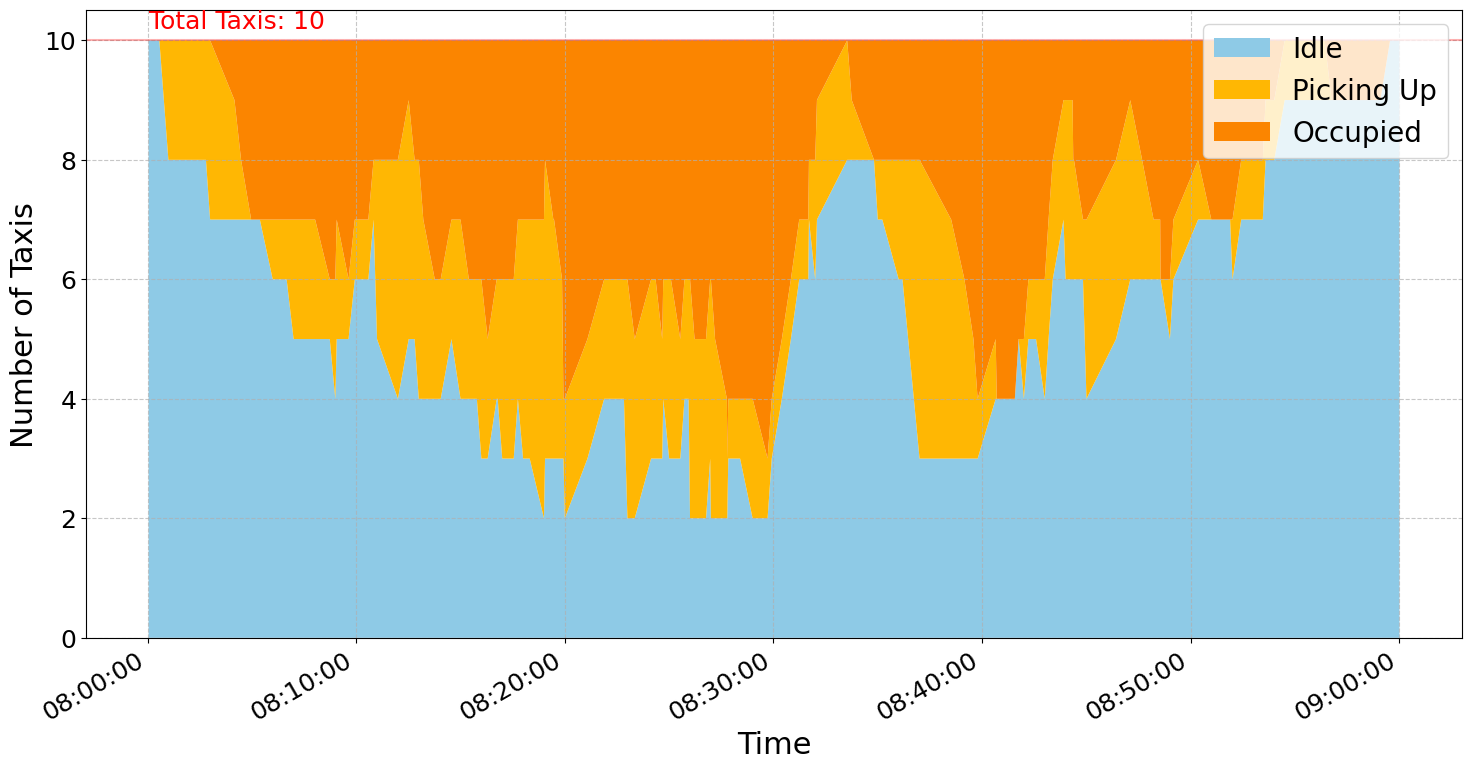

总出租车数量: 10
分析的时间点数量: 153
平均载客率: 29.28%
平均前往接客率: 17.52%
平均总工作率: 46.80%


In [46]:
import json
from collections import defaultdict
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime, timedelta
import numpy as np

def analyze_taxi_status(json_file_path):
    # 读取JSON文件
    with open(json_file_path, 'r') as file:
        orders = json.load(file)
    
    # 找出所有涉及的时间点和出租车
    all_times = set()
    all_taxis = set()
    taxi_orders = defaultdict(list)
    
    # 整理数据
    for order_id, order_info in orders.items():
        taxi_id = order_info.get("assigned_taxi")
        
        # 跳过没有分配出租车的订单
        if taxi_id is None:
            continue
            
        all_taxis.add(taxi_id)
        
        # 收集所有有效的时间点
        time_points = [
            order_info.get("request_time"),
            order_info.get("assigned_time"),
            order_info.get("pickup_time"),
            order_info.get("dropoff_time")
        ]
        
        # 只添加非None的时间点
        for time_point in time_points:
            if time_point is not None:
                all_times.add(time_point)
        
        # 将订单信息添加到对应出租车的列表中
        taxi_orders[taxi_id].append({
            "order_id": order_info["order_id"],
            "request_time": order_info.get("request_time"),
            "assigned_time": order_info.get("assigned_time"),
            "pickup_time": order_info.get("pickup_time"),
            "dropoff_time": order_info.get("dropoff_time"),
            "status": order_info.get("status", "unknown")
        })
    
    # 按时间顺序排序所有时间点
    all_times = sorted(all_times)
    
    # 初始化结果字典
    status_timeline = {}
    
    # 对每个时间点，统计各种状态的出租车数量
    for time_point in all_times:
        status_counts = {
            "idle": 0,
            "heading_to_pickup": 0,
            "occupied": 0,
            "unknown": 0
        }
        
        taxi_status_details = {}
        
        for taxi_id in all_taxis:
            # 确定当前出租车在此时间点的状态
            current_status = "idle"  # 默认为空闲
            current_order = None
            
            for order in taxi_orders[taxi_id]:
                # 检查是否有None值
                assigned_time = order.get("assigned_time")
                pickup_time = order.get("pickup_time")
                dropoff_time = order.get("dropoff_time")
                
                # 如果关键时间点为None，跳过这个订单的状态判断
                if assigned_time is None or pickup_time is None or dropoff_time is None:
                    continue
                
                # 如果时间点在分配时间和接客时间之间，状态为"前往接客"
                if assigned_time <= time_point < pickup_time:
                    current_status = "heading_to_pickup"
                    current_order = order["order_id"]
                    break
                # 如果时间点在接客时间和送达时间之间，状态为"载客中"
                elif pickup_time <= time_point < dropoff_time:
                    current_status = "occupied"
                    current_order = order["order_id"]
                    break
            
            # 更新计数
            status_counts[current_status] += 1
            
            # 记录详细信息
            taxi_status_details[taxi_id] = {
                "status": current_status,
                "current_order": current_order
            }
        
        # 存储这个时间点的状态统计
        status_timeline[time_point] = {
            "counts": status_counts,
            "details": taxi_status_details
        }
    
    return status_timeline, len(all_taxis)

def plot_stacked_chart(timeline, total_taxis):
    # 设置全局字体大小
    plt.rcParams.update({'font.size': 16})
    
    # 提取数据用于绘图
    times = sorted(timeline.keys())
    
    # 转换时间戳为可读时间（假设时间戳是秒）
    # 使用一个参考日期，因为我们只关心时间
    reference_date = datetime(2025, 4, 28)  # 使用文件名中的日期
    readable_times = [reference_date + timedelta(seconds=t) for t in times]
    
    # 提取各状态的出租车数量
    idle_counts = [timeline[t]['counts']['idle'] for t in times]
    heading_counts = [timeline[t]['counts']['heading_to_pickup'] for t in times]
    occupied_counts = [timeline[t]['counts']['occupied'] for t in times]
    unknown_counts = [timeline[t]['counts']['unknown'] for t in times]
    
    # 创建堆叠图
    plt.figure(figsize=(15, 8))
    
    # 创建堆叠区域
    plt.stackplot(readable_times, 
                  idle_counts, 
                  heading_counts, 
                  occupied_counts,
                  labels=['Idle', 'Picking Up', 'Occupied'],
                  colors=['#8ecae6', '#ffb703', '#fb8500'])
    
    # 设置图表属性
    plt.xlabel('Time', fontsize=22)
    plt.ylabel('Number of Taxis', fontsize=22)
    
    # 设置x轴格式
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M:%S'))
    plt.gcf().autofmt_xdate()  # 自动旋转日期标签
    
    # 设置刻度标签大小
    plt.xticks(fontsize=18)
    plt.yticks(fontsize=18)
    
    # 设置y轴范围
    plt.ylim(0, total_taxis * 1.05)  # 稍微高于总出租车数以便于查看
    
    # 添加网格线
    plt.grid(True, linestyle='--', alpha=0.7)
    
    # 添加图例
    plt.legend(loc='upper right', fontsize=20)
    
    # 添加总出租车数量的水平线
    plt.axhline(y=total_taxis, color='r', linestyle='-', alpha=0.3, label='Total Taxis')
    
    # 添加注释
    plt.annotate(f'Total Taxis: {total_taxis}', 
                 xy=(readable_times[0], total_taxis),
                 xytext=(readable_times[0], total_taxis * 1.02),
                 color='red',
                 fontsize=18)
    
    # 保存图表
    plt.tight_layout()
    
    # 显示图表
    plt.show()

# 使用示例
if __name__ == "__main__":
    file_path = "/home/yuhao/project/TrafficSimulator/results/orders_history_20250429_1810.json"  # 你的JSON文件路径
    timeline, total_taxis = analyze_taxi_status(file_path)
    
    # 绘制堆叠图
    plot_stacked_chart(timeline, total_taxis)
    
    # 打印一些基本统计信息
    print(f"总出租车数量: {total_taxis}")
    print(f"分析的时间点数量: {len(timeline)}")
    
    # 计算平均利用率
    total_occupied_time = 0
    total_heading_time = 0
    total_time_points = len(timeline)
    
    for time, data in timeline.items():
        total_occupied_time += data['counts']['occupied'] / total_taxis
        total_heading_time += data['counts']['heading_to_pickup'] / total_taxis
    
    avg_occupied_rate = (total_occupied_time / total_time_points) * 100
    avg_heading_rate = (total_heading_time / total_time_points) * 100
    
    print(f"平均载客率: {avg_occupied_rate:.2f}%")
    print(f"平均前往接客率: {avg_heading_rate:.2f}%")
    print(f"平均总工作率: {(avg_occupied_rate + avg_heading_rate):.2f}%")


成功读取原始图文件，包含 1537 个节点和 2297 条边
原始图是连通的
重构后的图是连通的，所有节点可以互相到达
处理完成! 重构后的图包含 1537 个节点和 2266 条边


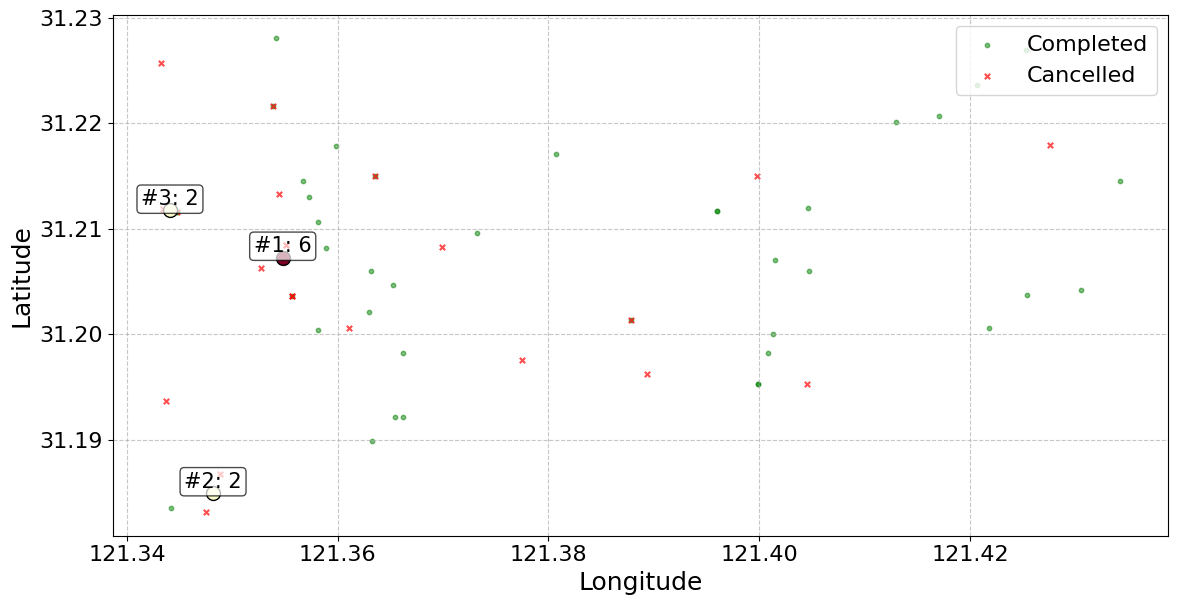

In [36]:
from traffic_simulator.manager.RoadNetworkManager import RoadNetworkManager
from traffic_simulator.tool.DataTool import DataTool

def visualize_orders_on_map(json_file_path: str, road_network_manager, output_path: str = None):
    """
    根据经纬度将所有订单绘制在地图上，区分完成订单和取消订单，
    并标记出高取消订单聚集区域
    
    参数:
        json_file_path: JSON文件路径
        road_network_manager: 道路网络管理器实例
        output_path: 输出图像的路径，默认为None（显示图像而不保存）
    """
    import json
    import numpy as np
    import matplotlib.pyplot as plt
    from sklearn.cluster import DBSCAN
    from collections import defaultdict
    import matplotlib.cm as cm
    from matplotlib.colors import Normalize
    
    # 1. 读取JSON文件
    with open(json_file_path, 'r') as f:
        orders_data = json.load(f)
    
    # 2. 提取所有订单的位置和状态
    completed_orders = []
    cancelled_orders = []
    
    for order_id, order_info in orders_data.items():
        pickup_node = order_info.get('pickup_node')
        status = order_info.get('status')
        
        if pickup_node is not None and status is not None:
            try:
                # 获取节点坐标
                coord = road_network_manager.get_coord_by_node(pickup_node)
                
                # 根据状态分类
                if status == 'completed':
                    completed_orders.append({
                        'order_id': order_id,
                        'node_id': pickup_node,
                        'coord': coord
                    })
                elif status == 'cancelled':
                    cancelled_orders.append({
                        'order_id': order_id,
                        'node_id': pickup_node,
                        'coord': coord
                    })
            except Exception:
                # 如果无法获取坐标，跳过该订单
                continue
    
    # 3. 对取消订单进行空间聚类，找出高取消订单聚集区域
    def spatial_clustering(orders, spatial_eps=0.005, min_samples=2):
        """对订单进行空间聚类"""
        if not orders:
            return []
        
        # 提取坐标
        coords = np.array([order['coord'] for order in orders])
        
        # 应用DBSCAN进行空间聚类
        clustering = DBSCAN(eps=spatial_eps, min_samples=min_samples).fit(coords)
        labels = clustering.labels_
        
        # 为每个空间聚类找到中心点和包含的订单
        space_clusters = []
        for label in set(labels):
            if label == -1:  # 忽略噪声点
                continue
            
            # 获取该聚类的所有订单
            cluster_orders = [orders[i] for i in range(len(orders)) if labels[i] == label]
            
            # 计算聚类的空间中心
            cluster_points = np.array([order['coord'] for order in cluster_orders])
            center = np.mean(cluster_points, axis=0)
            
            # 计算取消订单数量
            cancelled_count = len(cluster_orders)
            
            space_clusters.append({
                'center': center,
                'points': cluster_points,
                'cancelled_orders': cancelled_count
            })
        
        # 按取消订单数量降序排序
        space_clusters.sort(key=lambda x: -x['cancelled_orders'])
        
        return space_clusters
    
    # 4. 进行空间聚类
    hotspot_clusters = spatial_clustering(cancelled_orders)
    
    # 5. 创建地图可视化
    plt.rcParams.update({'font.size': 14})  # 增加默认字体大小
    fig, ax = plt.subplots(figsize=(12, 10))  # 创建图形和坐标轴对象
    
    # 绘制完成订单（绿色点）
    completed_coords = np.array([order['coord'] for order in completed_orders])
    if len(completed_coords) > 0:
        ax.scatter(
            completed_coords[:, 0], 
            completed_coords[:, 1], 
            c='green', 
            marker='o', 
            alpha=0.5, 
            s=10, 
            label='Completed'
        )
    
    # 绘制取消订单（红色点）
    cancelled_coords = np.array([order['coord'] for order in cancelled_orders])
    if len(cancelled_coords) > 0:
        ax.scatter(
            cancelled_coords[:, 0], 
            cancelled_coords[:, 1], 
            c='red', 
            marker='x', 
            alpha=0.7, 
            s=15, 
            label='Cancelled'
        )
    
    # 绘制高取消订单聚集区域
    if hotspot_clusters:
        max_cancelled = max([c['cancelled_orders'] for c in hotspot_clusters])
        norm = Normalize(vmin=3, vmax=max_cancelled)
        cmap = cm.YlOrRd
        
        # 创建一个散点图对象，用于关联颜色条
        sc = None
        
        for i, cluster in enumerate(hotspot_clusters):
            center = cluster['center']
            count = cluster['cancelled_orders']
            color = cmap(norm(count))
            
            # 聚类中心
            sc = ax.scatter(
                center[0], 
                center[1], 
                c=[color], 
                marker='o', 
                s=100, 
                edgecolors='black', 
                linewidths=1
            )
            
            # 添加标签
            ax.text(
                center[0], 
                center[1] + 0.0005, 
                f"#{i+1}: {count}", 
                fontsize=15, 
                ha='center', 
                bbox=dict(facecolor='white', alpha=0.7, boxstyle='round,pad=0.2')
            )
        
    # 设置图例和标题
    ax.legend(loc='upper right', fontsize=16)  # 增大图例字体
    ax.set_xlabel('Longitude', fontsize=18)  # 增大X轴标签
    ax.set_ylabel('Latitude', fontsize=18)  # 增大Y轴标签
    ax.tick_params(axis='both', which='major', labelsize=16)  # 增大刻度标签
    ax.grid(True, linestyle='--', alpha=0.7)
    
    # 添加标题
    
    # 调整坐标轴比例，使地图不变形
    ax.set_aspect('equal')
    
    # 保存或显示图像
    plt.tight_layout()
    if output_path:
        plt.savefig(output_path, dpi=300, bbox_inches='tight')
        print(f"地图已保存至: {output_path}")
    else:
        plt.show()

# 使用示例
input_graphml = "/home/yuhao/project/data/input_network.graphml"
G = DataTool.reconstruct_graph(input_path=input_graphml)
road_network_manager = RoadNetworkManager(G)

# 可视化所有订单
visualize_orders_on_map(
    '/home/yuhao/project/TrafficSimulator/results/orders_history_20250429_1813.json', 
    road_network_manager,
)
